### Bank Marketing Analysis

### Import The Libraries

In [1]:
###Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Import The Dataset

In [2]:
###Import the Dataset
Bank_Data = pd.read_csv('bank-full.csv')
Bank_Data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
### Data Info
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
### Data Description
Bank_Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
###Checking The Null Value
Bank_Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### Bank Marketing Data Doesnot possess Null Values

In [6]:
### Checking For Duplicate Value
Bank_Data.duplicated().sum()

0

In [7]:
### Changing the Name y into Deposit
Bank_Data.rename(columns={'y':'Deposit'},inplace=True)

##### Bank Marketing Data Doesnot possess Duplicate Values

## Exploratory Data Analysis

### Plotting Various Graph to Carry out EDA

Text(0.5, 1.0, 'Distribution of Age')

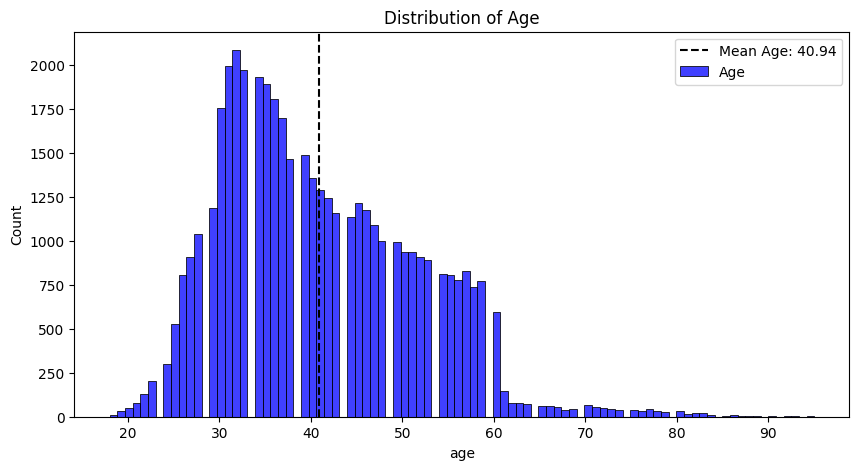

In [8]:
### Distribution of age count
plt.figure(figsize=(10,5))
sns.histplot(x=Bank_Data['age'],color='Blue',label='Age')
plt.axvline(x=Bank_Data['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(Bank_Data['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')

##### From the above graph we can see that the Median age is 40.94 and age 34 has the highest count the Data

<ipython-input-9-f4fa8a9a8d56>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=Bank_Data['duration'],color='Green',shade=True,label='Duration')


Text(0.5, 1.0, 'Distribution of duration')

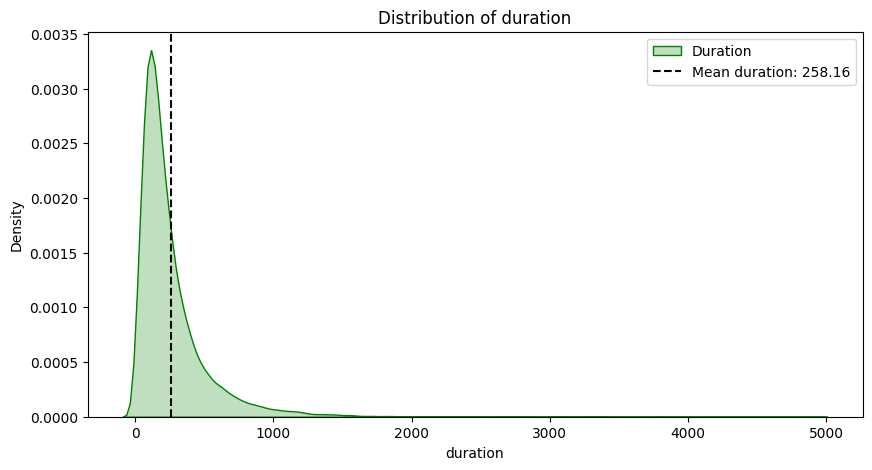

In [9]:
### Distribution of Duration
plt.figure(figsize=(10,5))
sns.kdeplot(x=Bank_Data['duration'],color='Green',shade=True,label='Duration')
plt.axvline(x=Bank_Data['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(Bank_Data['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')

##### From the above graph we can see that the Mean duration is 258.16

<ipython-input-10-87a899249f57>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=Bank_Data['pdays'],color='Red',shade=True,label='Pdays')


Text(0.5, 1.0, 'Distribution of pdays')

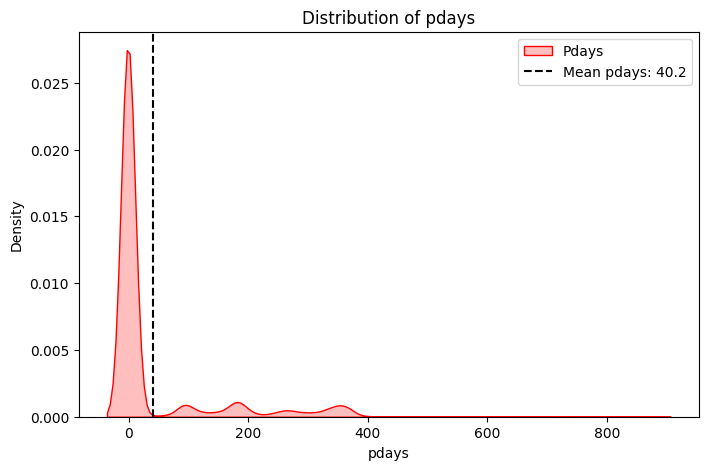

In [10]:
### Distribution of Pdays
plt.figure(figsize=(8,5))
sns.kdeplot(x=Bank_Data['pdays'],color='Red',shade=True,label='Pdays')
plt.axvline(x=Bank_Data['pdays'].mean(),color='k',linestyle ="--",label='Mean pdays: {}'.format(round(Bank_Data['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of pdays')

##### From the above graph we can see that the Mean pdays is 40.2

Text(0.5, 0, 'Job')

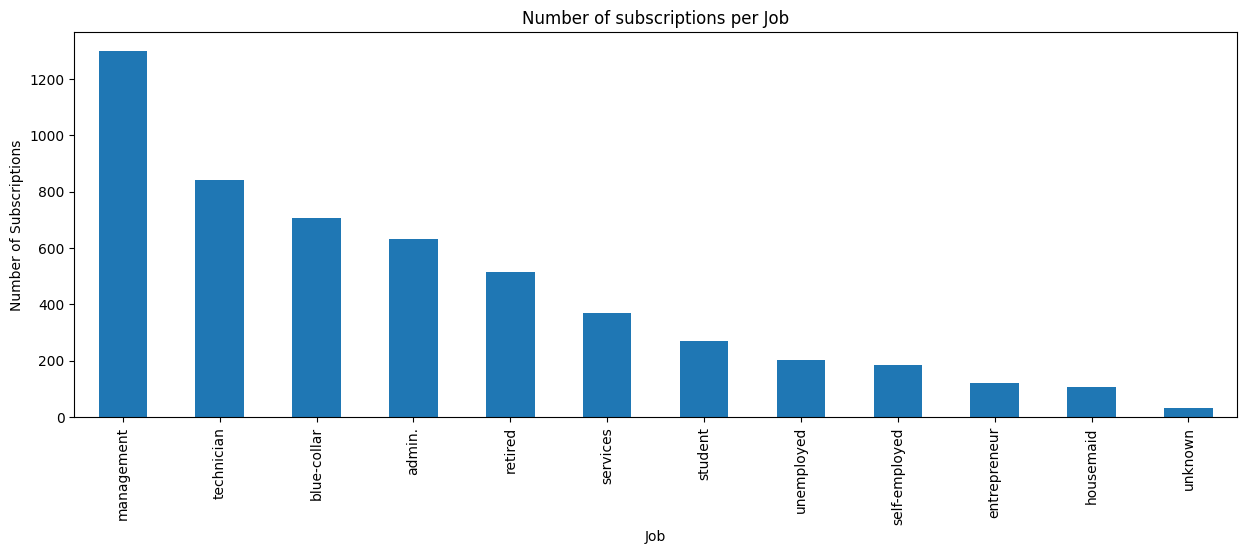

In [11]:
### Number of Subscription Per Job
data = Bank_Data[Bank_Data['Deposit'] == 'yes'].groupby(Bank_Data['job'])
N = 12
data['job'].count().nlargest(N).plot.bar(figsize=(15, 5),
                                           title='Number of subscriptions per Job')
plt.grid(False)
plt.ylabel("Number of Subscriptions")
plt.xlabel("Job")

##### From the above graph we can see that the Management has the Highest Subcription among all.

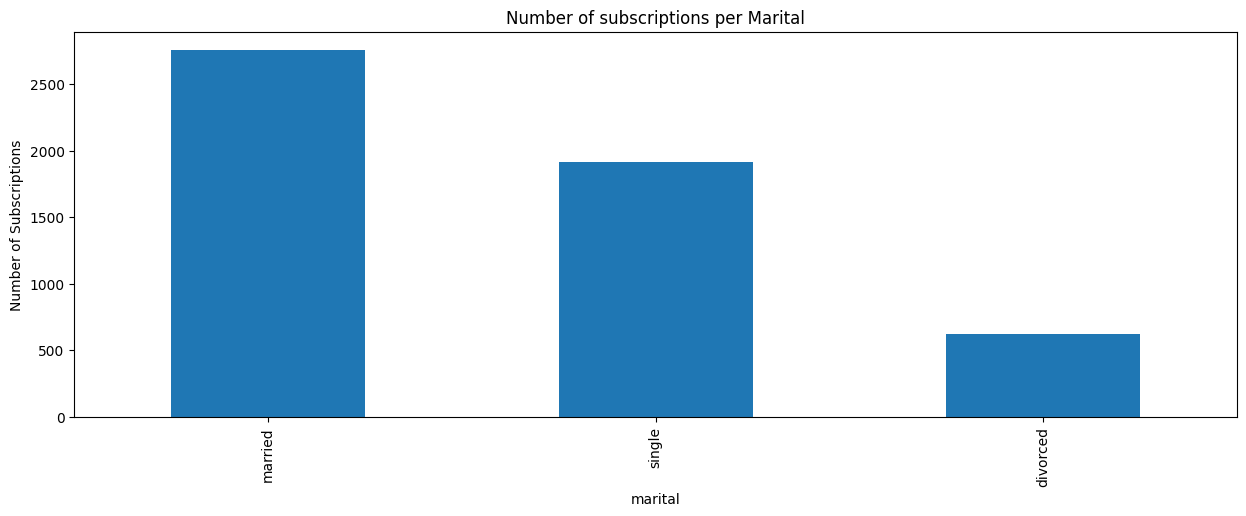

Proportion from the biggest number to the second one: 1.4408995815899581


In [12]:
### Number of Subscription per Martial
data = Bank_Data[Bank_Data['Deposit'] == 'yes'].groupby(Bank_Data['marital'])
N = 3
data['marital'].count().nlargest(N).plot.bar(figsize=(15, 5),
                                           title='Number of subscriptions per Marital')
plt.ylabel("Number of Subscriptions")
plt.show()
print('Proportion from the biggest number to the second one: {}'.format(
      data['marital'].count().nlargest(N)[0] / data['marital'].count().nlargest(N)[1]))

##### From the above graph we can see that the Married has the Highest Subcription among all.

Text(0, 0.5, 'Count')

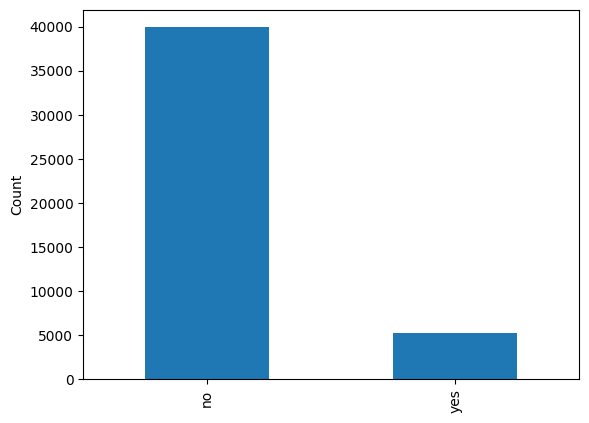

In [13]:
### Number of Deposited Count
Bank_Data['Deposit'].value_counts().plot.bar()
plt.ylabel('Count')

##### From the above graph we can see that Around 5000 Has Deposited.

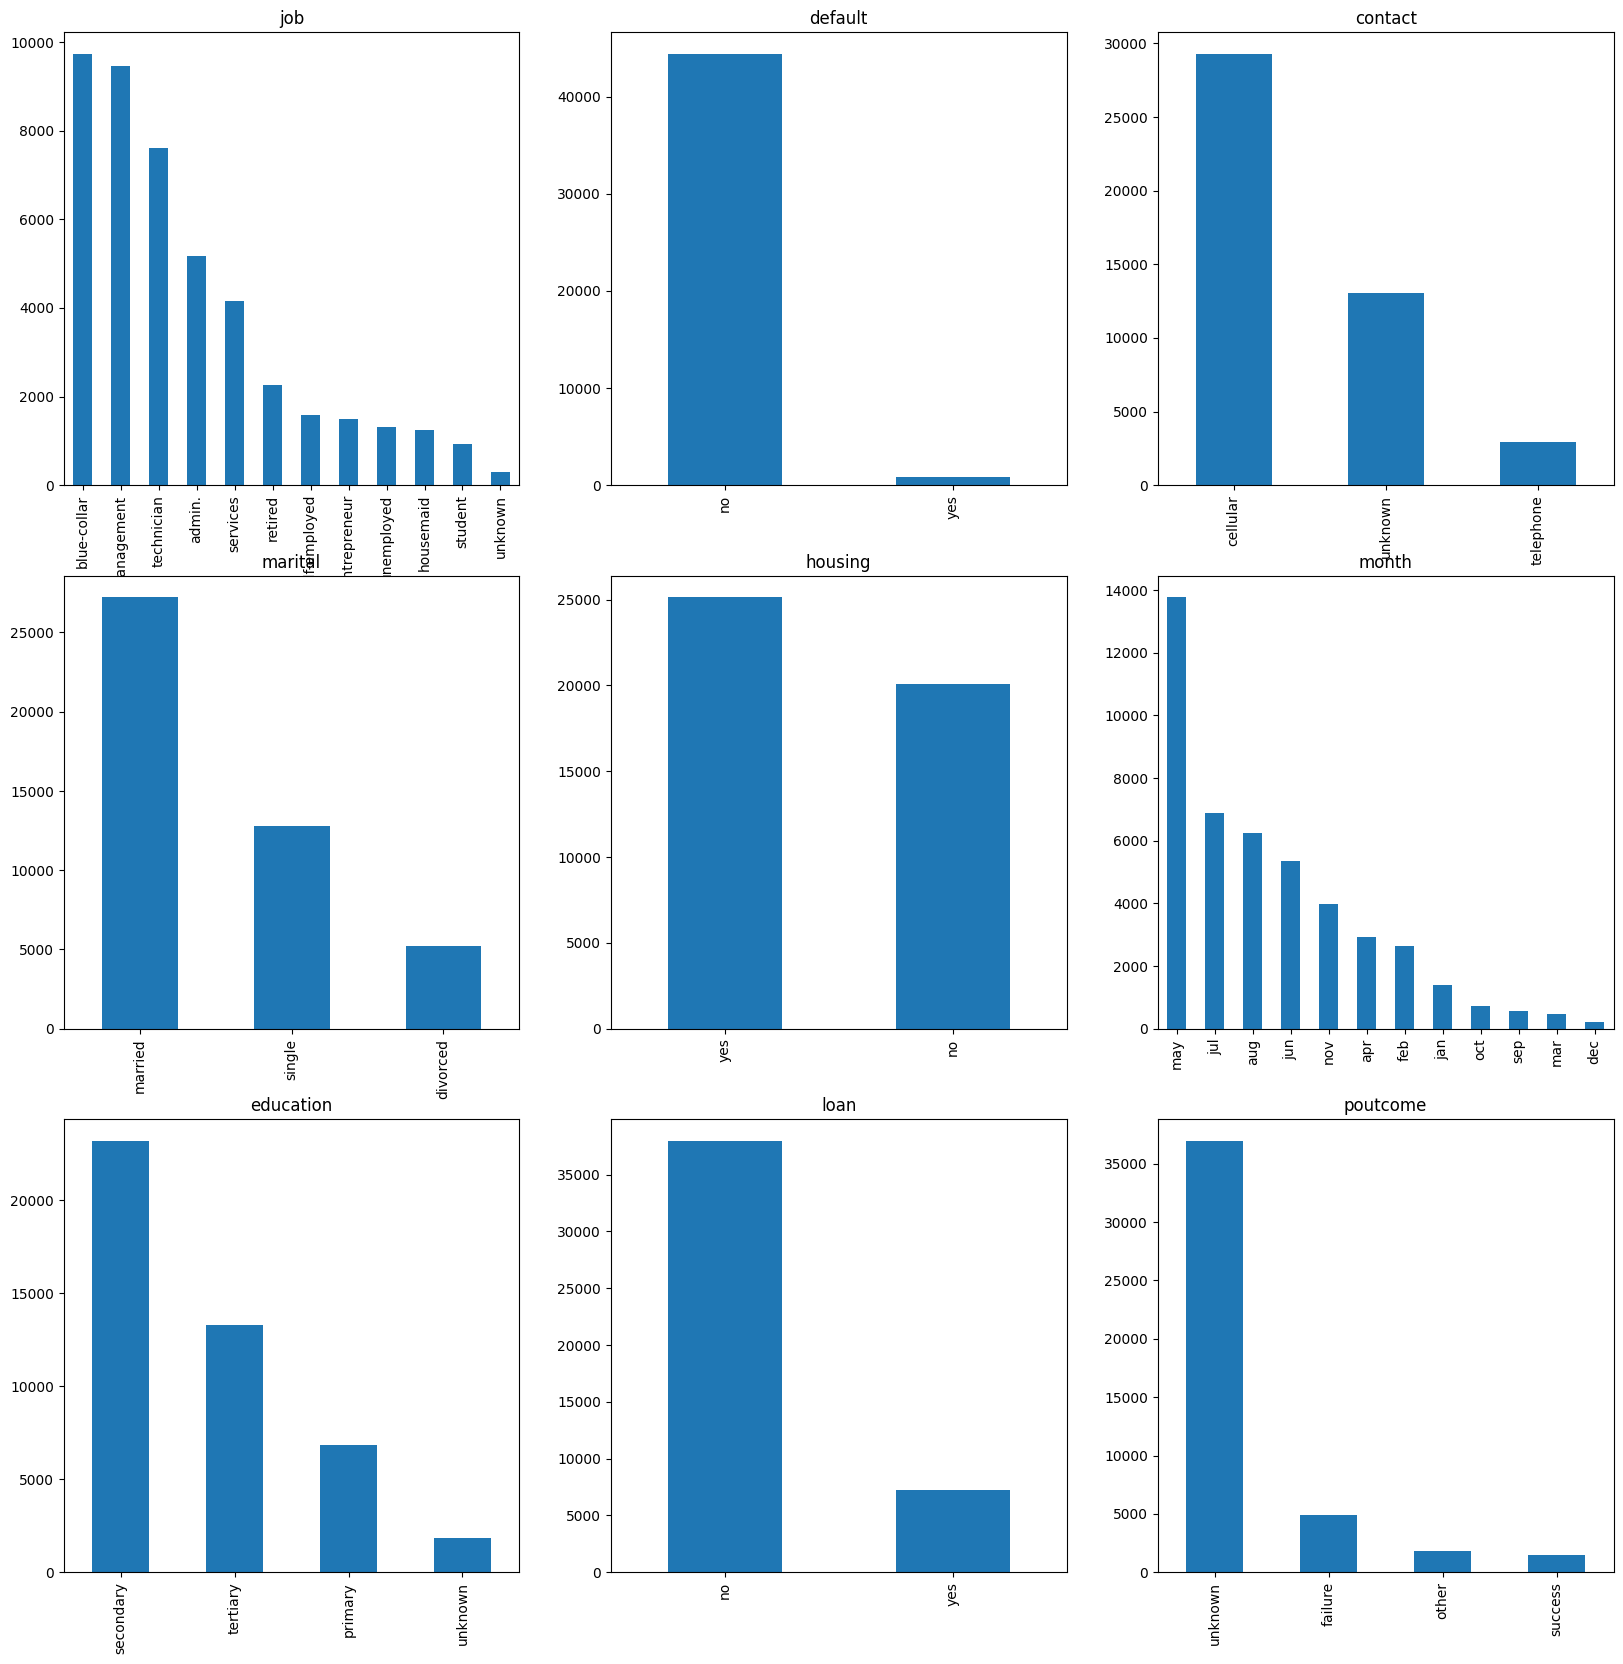

In [14]:
### Overview of the Categorical Data
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, col in enumerate(categorical_cols):
    row_index = (i % 3)
    col_index = int(i / 3)
    fig.add_subplot(Bank_Data[col].value_counts().plot.bar(ax=axes[row_index, col_index], title=col))

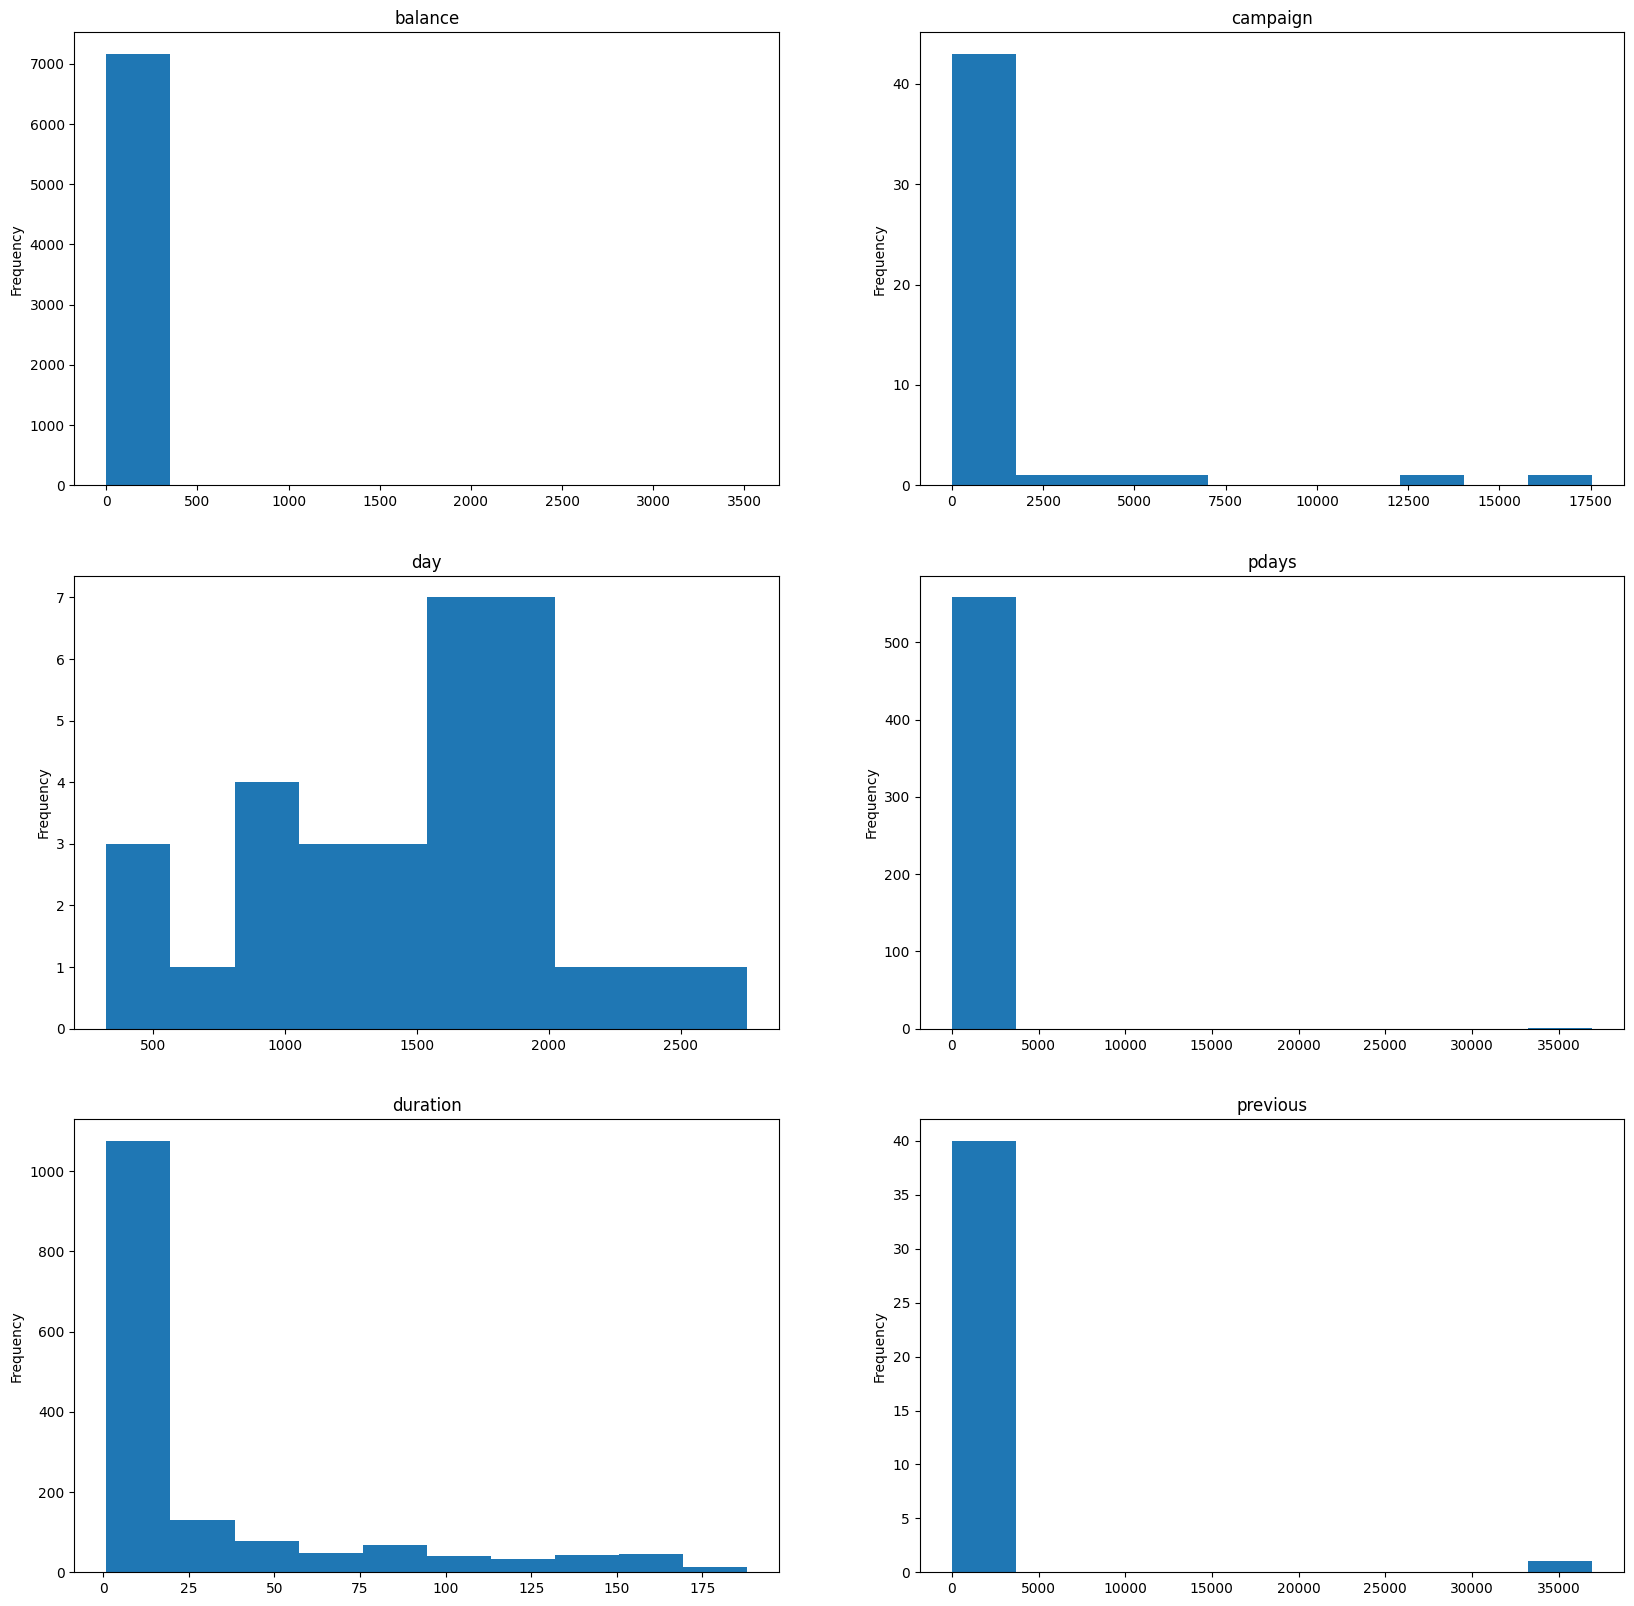

In [15]:
### Overview of the Numerical Data
numerical_cols = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
for i, col in enumerate(numerical_cols):
    row_index = (i % 3)
    col_index = i // 3
    fig.add_subplot(Bank_Data[col].value_counts().plot.hist(ax=axes[row_index, col_index], title=col))    

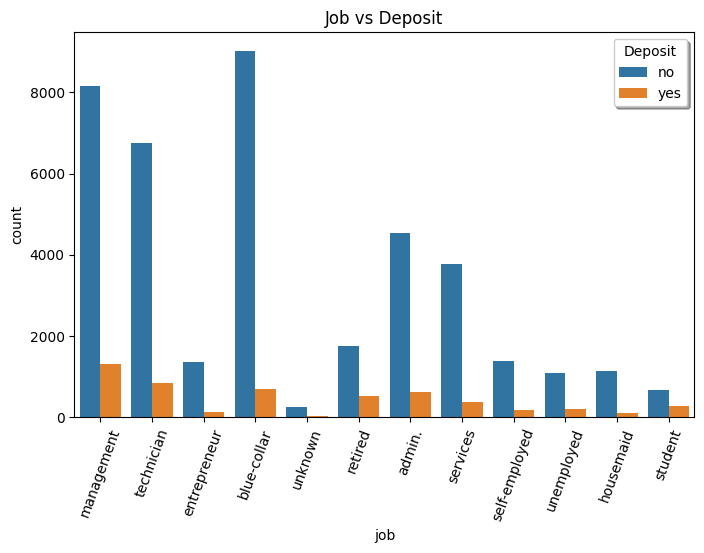

In [16]:
### Job VS Deposit
plt.figure(figsize=(8, 5));
plt.title('Job vs Deposit')
g = sns.countplot(x= 'job', hue = 'Deposit', data=Bank_Data)
plt.xticks(rotation=70)
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.show()

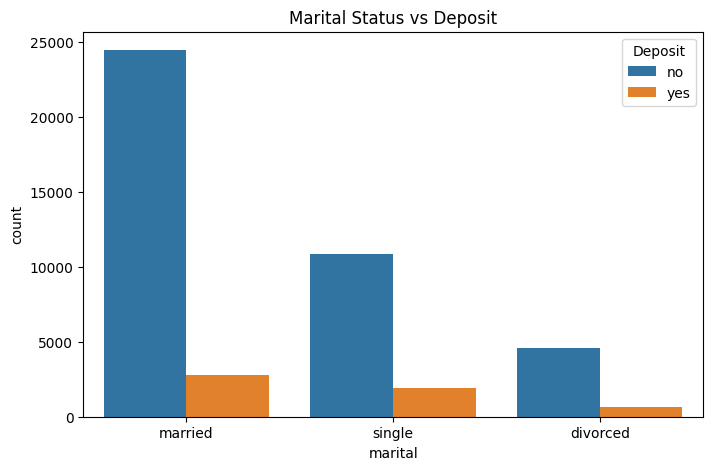

In [17]:
### Martial Status Vs Deposit
plt.figure(figsize=(8, 5));
plt.title('Marital Status vs Deposit')
g = sns.countplot(x= 'marital', hue = 'Deposit', data=Bank_Data)
plt.xticks(rotation=0)
plt.show()

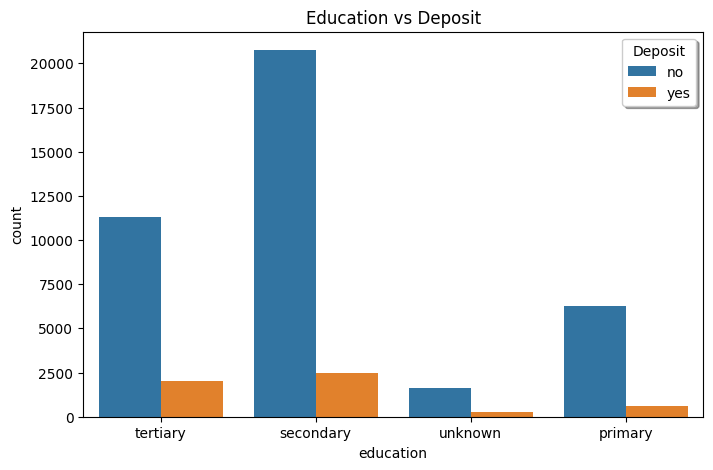

In [18]:
### Education Vs Deposit
plt.figure(figsize=(8, 5));
plt.title('Education vs Deposit')
g = sns.countplot(x= 'education', hue = 'Deposit', data=Bank_Data)
plt.xticks(rotation=0)
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.show()

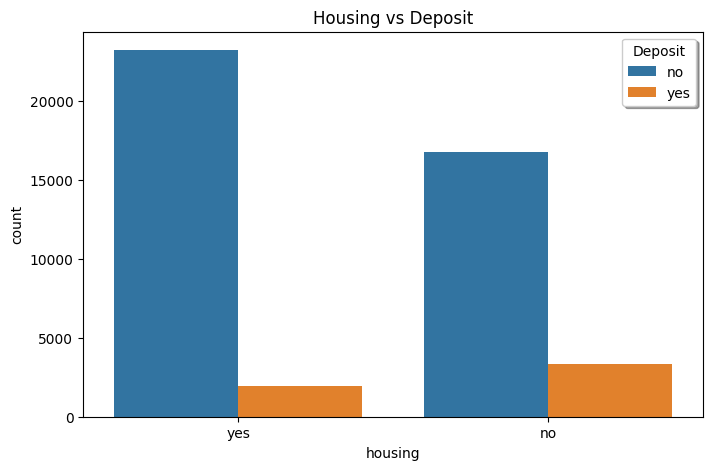

In [19]:
### Housing vs Deposit
plt.figure(figsize=(8, 5));
plt.title('Housing vs Deposit')
g = sns.countplot(x= 'housing', hue = 'Deposit', data=Bank_Data)
plt.xticks(rotation=0)
plt.legend(title='Deposit', ncol=1, fancybox=True, shadow=True)
plt.show()

### Heat Map To check Correlation 

<Axes: >

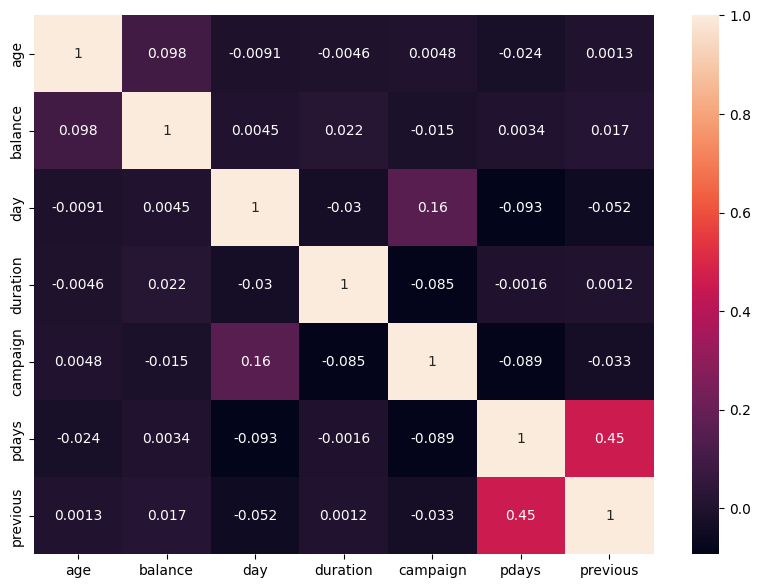

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(data=Bank_Data.corr(), annot=True)

### Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in Bank_Data:
    if Bank_Data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(Bank_Data[col].unique())) <= 2:
        
            le.fit(Bank_Data[col])
            Bank_Data[col] = le.transform(Bank_Data[col])
            
           
            le_count += 1
            print('%d columns were label encoded.' % le_count)

1 columns were label encoded.
2 columns were label encoded.
3 columns were label encoded.
4 columns were label encoded.


### Getting Dummies

In [22]:
Bank_Data1=pd.get_dummies(Bank_Data)

In [23]:
Bank_Data1.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


### Cross validation

In [24]:
X=Bank_Data1.drop(columns='Deposit',axis=1)
y=Bank_Data1.Deposit

### Train Test And Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Using Random FOrest Classifier to train and predict on original dataset
rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

### Predicting the Test Data

In [28]:
y_pred_rf= rf_model.predict(X_test)

In [29]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Metrics

[[7789  203]
 [ 668  383]]
0.9036824062811014


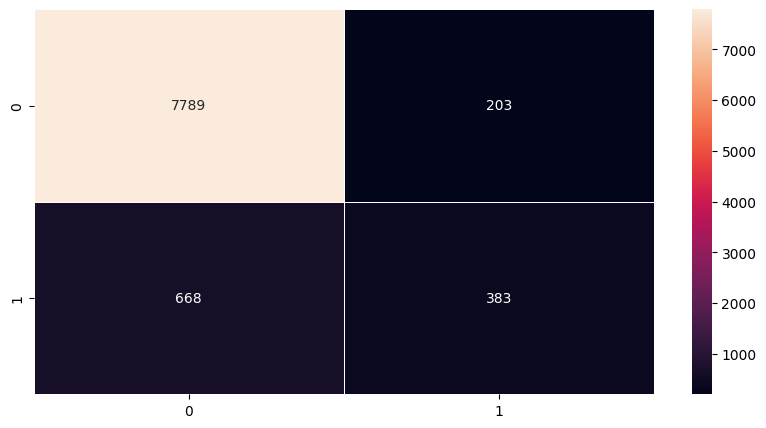

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print(accuracy_score(y_test, y_pred_rf))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

### Checking The Over Fitting

In [31]:
print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9037


### Mean Squared Error

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
print("RMSE score for Random Forest Classifier : ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE score for Random Forest Classifier :  0.3103507591724219


### XGBoost Classifier

In [34]:
from xgboost import XGBClassifier
Xgb_model = XGBClassifier(max_depth=10,learning_rate=0.2)

In [35]:
Xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Predicting The Test Data

In [36]:
y_pred_XGB= Xgb_model.predict(X_test)

In [37]:
y_pred_XGB

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix

[[7704  288]
 [ 535  516]]
0.9089903792989052


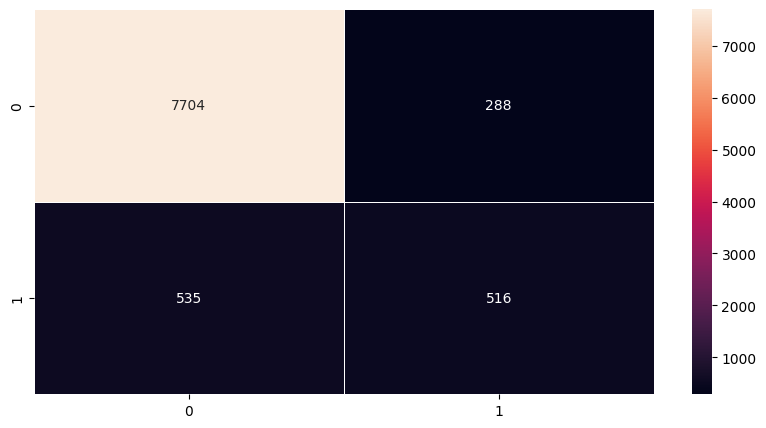

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_XGB)
print(cm)
print(accuracy_score(y_test, y_pred_XGB))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

### Checking the Over Fitting

In [39]:
print('Training set score: {:.4f}'.format(Xgb_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(Xgb_model.score(X_test, y_test)))

Training set score: 0.9848
Test set score: 0.9090


### Mean Squared Error

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
print("RMSE score for XGBoost Classifier : ", np.sqrt(mean_squared_error(y_test,y_pred_XGB)))

RMSE score for XGBoost Classifier :  0.30167800831531416


### Converting The Prediction Values Into Categorical Value for further analysis

In [42]:
Deposit_Pred_rf = pd.DataFrame(data = y_pred_rf )

In [43]:
Deposit_Pred_rf

,0
0,0
1,0
2,0
3,0
4,0
...,...
9038,1
9039,0
9040,0
9041,0


In [44]:
Converted_Pred_rf = Deposit_Pred_rf[0].map({1:'Yes',0:'No'})

In [45]:
Converted_Pred_rf

0        No
1        No
2        No
3        No
4        No
       ... 
9038    Yes
9039     No
9040     No
9041     No
9042     No
Name: 0, Length: 9043, dtype: object

In [46]:
Deposit_Pred_XGB = pd.DataFrame(data = y_pred_XGB )

In [47]:
Deposit_Pred_XGB

,0
0,0
1,0
2,0
3,0
4,0
...,...
9038,0
9039,1
9040,0
9041,0


In [48]:
Converted_Pred_XGB = Deposit_Pred_XGB[0].map({1:'Yes',0:'No'})

In [49]:
Converted_Pred_XGB

0        No
1        No
2        No
3        No
4        No
       ... 
9038     No
9039    Yes
9040     No
9041     No
9042     No
Name: 0, Length: 9043, dtype: object

### Prediction File of Random Forest and XGB

### Random Forest Classifier

In [50]:
submission_random_forest = pd.DataFrame()
submission_random_forest['Deposit'] = Converted_Pred_rf

In [51]:
submission_random_forest.to_csv('submission_random_forest', index=False)

### XGBoost Classifier

In [52]:
submission_XGBoost_Classifier = pd.DataFrame()
submission_XGBoost_Classifier['Deposit'] = Converted_Pred_XGB

In [53]:
submission_XGBoost_Classifier.to_csv('submission_XGBoost_Classifier', index=False)